Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[

<Figure size 1000x500 with 0 Axes>

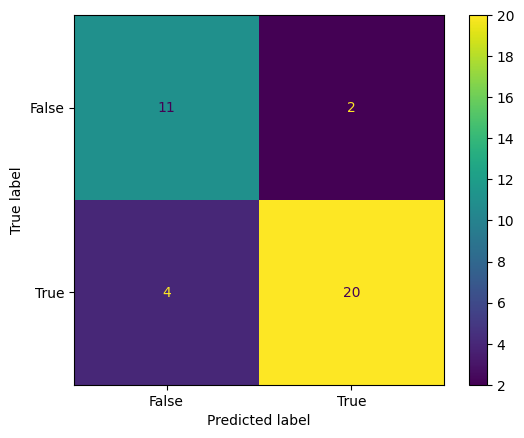

F1 Score: 0.8695652173913043
Precision: 0.9090909090909091
Recall: 0.8333333333333334


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier  # Using RandomForest as an example, but try other algorithms
import warnings

# Install and upgrade packages
!pip install -U lazypredict
!pip install -U pandas

warnings.filterwarnings('ignore')

# Load your dataset
url = "https://raw.githubusercontent.com/1205sreekar/CSD/main/data.csv"
df = pd.read_csv(url)

# Data preprocessing
df.drop(columns=["ID"], inplace=True)
df["class"] = [1 if i == "P" else 0 for i in df["class"]]

# Feature selection and data splitting
X = df.drop(columns="class")
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, shuffle=True, random_state=3)

# Feature scaling
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

scaler1.fit(X_train)
scaler2.fit(X_test)

X_train = pd.DataFrame(scaler1.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler2.transform(X_test), index=X_test.index, columns=X_test.columns)

# Dimensionality reduction using PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Model training and hyperparameter tuning (Random Forest as an example)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_classifier = RandomForestClassifier(random_state=3)

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='f1', verbose=2)
grid_search.fit(X_train_pca, y_train)

best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test_pca)

# Cross-validation
scores = cross_val_score(best_rf_classifier, X_train_pca, y_train, cv=5, scoring='f1')
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())
print("Standard Deviation of CV Scores:", scores.std())

# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
plt.figure(figsize=(10, 5))
cm_display.plot()
plt.show()

# Checking the F1 score, precision, and recall of the model
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
